<h1 style="text-align:center;">Resolução numérica de Equações Diferenciais de Primeira Ordem e Não Homogêneas</h1>

<h3>Método de Euler</h3>

<p style="text-align: justify; text-indent:4em">O método de Euler é descrito pela equação abaixo. Ele é conhecido como método da tangente e pode ser obtido como parte do polinômio de Taylor de
ordem 1, para aproximar y(t_n), em torno de t_n−1.</p>

\begin{align*} 
    y_{n+1} = y_n + hf(x_n, y_n) 
\end{align*} 
<center style="margin-top:6px;">Equação - Método de Euler</center>

In [9]:
# Euler = Range-Kutta de primeira ordem
def predicao_euler(f: object, x: float, y: float, h: float):
    """
    funcao que retorna a variacao em y - delta y - em um intervalo x ate x+h
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param x: valor do dominio
    :param y: valor da imagem
    :param h: 'distancia' entre os elementos do dominio
    """
    return h*f(x, y)


def calcular_por_euler(f: object, x0: float, y0: float, h: float, n: int):
    """
    Funcao que retorn duas lista: uma com seu dominio e outra com com sua imagem, atraves do metodo 
    de euler 
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param x0: valor inicial do dominio
    :param y0: imagem do valor do valor inicial do dominio
    :param h: 'distancia' entre os elementos do dominio
    :param n: numero de total de elementos em cada conjunto - imagem e dominio
    """
    imagem = [0]*n
    dominio = [0]*n
    imagem[0] = y0
    dominio[0] = x0
    
    aux = x0
    for i in range(n-1):
        imagem[i+1] = imagem[i] + predicao_euler(f, dominio[i], imagem[i], h)
        aux += h
        dominio[i+1] = aux 
    
    return dominio, imagem 

<h3>Método de Euler Melhorado / Runge-Kutta de 2ª Ordem</h3>

<p style="text-align: justify; text-indent:4em"> Por de ser expresso por:</p>
<br>

\begin{align*}
f(x) = y_{n} + h\frac{ f(x_{n},y_{n}) + f(x_{n+1},y^*_{n+1}) } {2}\ 
\end{align*}
<center style="margin-top:6px;">Equação - Método de Euler Melhorado</center>

<p style="text-align: justify; text-indent:4em"> Onde tem-se que:</p>

\begin{align*} 
    y^*_{n+1} = y_n + hf(x_n, y_n) 
\end{align*} 
<center style="margin-top:6px;">Equação - Fator de correção</center>
<br>

In [2]:
# Método de euler melhorado = Runge-Kutta de ordem 2
def  predicao_rk2(f: object, x: float, y: float, h: float):
    """
    funcao que retorna a variacao em y - delta y - em um intervalo x ate x+h atraves 
    do metodo de euler melhorado
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param x: valor do dominio
    :param y: valor da imagem
    :param h: 'distancia' entre os elementos do dominio
    """
    y_pos = y + h*f(x,y)
    return  h*(( f(x, y) + f(x + h, y_pos)) /2)

def calcular_por_rk2(f: object, x0: float, y0: float, h: float, n: int):
    """
    Funcao que retorn duas lista: uma com seu dominio e outra com com sua imagem, atraves do metodo 
    de euler melhorado, o mesmo que Runge Kutta de ordem 2
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param x0: valor inicial do dominio
    :param y0: imagem do valor do valor inicial do dominio
    :param h: 'distancia' entre os elementos do dominio
    :param n: numero de total de elementos em cada conjunto - imagem e dominio
    """
    #Setup inicial     
    imagem = [0]*n
    dominio = [0]*n
    imagem[0] = y0
    dominio[0] = x0
    
    aux = x0
    for i in range(n-1):
        aux += h
        dominio[i+1] = aux 
        imagem[i+1] = imagem[i] + predicao_rk2(f, dominio[i], imagem[i], h)
        
    
    return dominio, imagem 

<h3>Método Runge-Kutta de 3ª ordem</h3>

<p style="text-align: justify; text-indent:4em"> Ele pode ser descrito por:</p>

\begin{align*} 
\left(
\begin{array}{c}
y_{n+1} = y_n + \frac{h}{6}(k_1 + 4k_2 + k_3)\\
k_1 = f(x_n, y_n)\\
k_2 = f(x_n + \frac{h}{2},  y_n + \frac{h}{2}k_1)\\
k_3 = f(x_n + h,  y_n + 2hk_2 - hk_1)\\
\end{array}
\right)
\end{align*} 

<center style="margin-top:6px;">Equação - Range-Kutta de ordem 3</center>
<br>

In [3]:
# Método de range-kutta 3ª ordem
def  predicao_rk3(f: object, x: float, y: float, h: float):
    """
    funcao que retorna a variacao em y - delta y - em um intervalo x ate x+h atraves 
    do metodo Runge Kutta 3
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param x: valor do dominio
    :param y: valor da imagem
    :param h: 'distancia' entre os elementos do dominio
    """
    k1 = f(x, y)
    k2 = f(x+(h/2), (y+(h*k1/2)))
    k3 = f(x+h, y+2*h*k2 - h*k1)
    return h/6*(k1 + 4*k2 + k3)

def calcular_por_rk3(f: object, x0: float, y0: float, h: float, n: int):
    """
    Funcao que retorn duas lista: uma com seu dominio e outra com com sua imagem, atraves do 
    metodo Runge Kutta de ordem 3
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param x0: valor inicial do dominio
    :param y0: imagem do valor do valor inicial do dominio
    :param h: 'distancia' entre os elementos do dominio
    :param n: numero de total de elementos em cada conjunto - imagem e dominio
    """
    #Setup inicial     
    imagem = [0]*n
    dominio = [0]*n
    imagem[0] = y0
    dominio[0] = x0
    
    aux = x0
    for i in range(n-1):
        aux += h
        dominio[i+1] = aux 
        imagem[i+1] = imagem[i] + predicao_rk3(f, dominio[i], imagem[i], h)
        
    
    return dominio, imagem 


<h3>Método Runge-Kutta de 4ª ordem</h3>

<p style="text-align: justify; text-indent:4em"> Ele pode ser descrito como:</p>

\begin{align*} 
\left(
\begin{array}{c}
y_{n+1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)\\
k_1 = hf(x_n, y_n)\\
k_2 = hf(x_n + \frac{h}{2},  y_n + \frac{k_1}{2})\\
k_3 = hf(x_n + \frac{h}{2},  y_n + \frac{k_2}{2})\\
k_4 = hf(x_n + h,  y_n + k_3)\\
\end{array}
\right)
\end{align*} 

<center style="margin-top:6px;">Equação - Range-Kutta de ordem 4</center>
<br>

In [4]:
# Método de range-kutta 4ª ordem
def  predicao_rk4(f: object, x: float, y: float, h: float):
    """
    funcao que retorna a variacao em y - delta y - em um intervalo x ate x+h atraves 
    do metodo Runge Kutta 4
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param x: valor do dominio
    :param y: valor da imagem
    :param h: 'distancia' entre os elementos do dominio
    """
    k1 = h*f(x, y)
    k2 = h*f(x+(h/2), y+(k1/2))
    k3 = h*f(x+(h/2), y+(k2/2))
    k4 = h*f(x+h, y+k3)
    
    return 1/6*(k1 + 2*k2 + 2*k3 + k4)


def calcular_por_rk4(f: object, x0: float, y0: float, h: float, n: int):
    """
    Funcao que retorn duas lista: uma com seu dominio e outra com com sua imagem, atraves do 
    metodo Runge Kutta de ordem 4
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param x0: valor inicial do dominio
    :param y0: imagem do valor do valor inicial do dominio
    :param h: 'distancia' entre os elementos do dominio
    :param n: numero de total de elementos em cada conjunto - imagem e dominio
    """
    #Setup inicial     
    imagem = [0]*n
    dominio = [0]*n
    imagem[0] = y0
    dominio[0] = x0
    
    aux = x0
    for i in range(n-1):
        aux += h
        dominio[i+1] = aux 
        imagem[i+1] = imagem[i] + predicao_rk4(f, dominio[i], imagem[i], h)
        
    
    return dominio, imagem 


<h3>Métodos de Passos Múltiplos</h3>

<p style="text-align: justify; text-indent:4em">Métodos de passo múltiplos são utilizados para a soluções numéricas de equações diferenciais ordinárias. Conceitualmente, um método numérico começa a partir de um ponto inicial e, em seguida, leva um pequeno passo para a frente no tempo para encontrar o próximo ponto da solução. O processo continua com os passos subsequentes para mapear a solução. Métodos de uma etapa (como o método de Euler) referem-se a apenas um ponto anterior e sua derivada a determinar o valor atual. Métodos como os Runge-Kutta dão alguns passos intermediários (por exemplo, um meio-passo) para obter um método de ordem superior, mas, em seguida, descartam todas as informações anteriores antes de tomar uma segunda etapa. Métodos de várias etapas tentam ganhar eficiência, mantendo e usando as informações a partir das etapas anteriores, em vez de descartá-las. Consequentemente, os métodos de várias etapas referem-se a vários pontos anteriores e valores derivados. No caso de métodos de várias etapas lineares, uma combinação linear dos pontos anteriores e os valores derivados são utilizados. [2] </p>

<h4>Método de Adam-Bashfort</h4>

\begin{align*} 
    y_{n+1} = y_n + \frac{h}{24}[55f(x_n, y_n) - 59f(x_{n-1}, y_{n-1} + 37f(x_{n-2}, y_{n-2} - 9f(x_{n-3}, y_{n-3} )] 
\end{align*} 

<br>

In [5]:
# Método Adams-Bashforth de quarta ordem
def  predicao_ab4(f: object, xn: float, yn: float, condicoes_anteriores: list, h: float):
    """
    funcao que retorna a variacao em y - delta y - em um intervalo x ate x+h atraves 
    do metodo Adams Bashford de ordem 4
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param x: valor do dominio
    :param y: valor da imagem
    :param condicoes_anteriores: ex:[[xn_-3, xn_-2, xn_-1], [yn_-3, yn_-2, yn_-1] ]
    :param h: 'distancia' entre os elementos do dominio
    """
    x_anteriores = condicoes_anteriores[0]
    y_anteriores = condicoes_anteriores[1]
    k1 = f(xn,yn)
    k2 = f(x_anteriores[2], y_anteriores[2])
    k3 = f(x_anteriores[1], y_anteriores[1])
    k4 = f(x_anteriores[0], y_anteriores[0])
    
    return (h/24)*(55*k1 - 59*k2 + 37*k3 - 9*k4)

def calcular_por_ab4(f: object, x0: float, y0: float, h: float, n: int):
    """
    Funcao que retorn duas lista: uma com seu dominio e outra com com sua imagem, atraves do 
    metodo Adams Bashford de ordem 4
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param x0: valor inicial do dominio
    :param y0: imagem do valor do valor inicial do dominio
    :param h: 'distancia' entre os elementos do dominio
    :param n: numero de total de elementos em cada conjunto - imagem e dominio
    """
    #Setup inicial 
    imagem = [0]*n
    dominio = [0]*n
    condicoes_iniciais = calcular_por_rk4(f, x0, y0, h, 4)
    dominio[0:4] = condicoes_iniciais[0]
    imagem[0:4] = condicoes_iniciais[1]
    
    condicoes_anteriores = [[],[]]
    aux = dominio[3]
    for i in range(3, n-1):
        aux += h
        dominio[i+1] = aux 
        condicoes_anteriores[0] = dominio[i-3:i]
        condicoes_anteriores[1] = imagem[i-3:i]
        imagem[i+1] = imagem[i] + predicao_ab4(f, dominio[i], imagem[i], condicoes_anteriores, h)
        
    
    return dominio, imagem 



<p style="text-align: justify; text-indent:4em"> Esta célula tem como objetivo implementar funções que realizem alguns procedimentos matemáticos. Uma dessas funções implementadas é a de calcular precisão com base no erro relativo entre os elementos de um sinal original e de um aproximado, baseada na Equação 2.</p>
<br>

\begin{align*}
erro =   \left |\frac{Original - Aproximado}{Original} \right |
\end{align*}
<center style="margin-top:6px;">Equação - Erro Reltivo</center>

<br>

<p style="text-align: justify; text-indent:4em">Outra função implementada é a de calcular o desvio padrão, que assim como a função de calcular precisão, recebe dois conjuntos de valores, retornando o valor do desvio baseado na Equação 3.</p>

<br>

\begin{align*}
f(x) = \frac{\sqrt{ \sum_{i=0}^N (x_{i}-\bar x)^2 }} {n}\ 
\end{align*}
<center style="margin-top:6px;">Equação - Desvio Padrão</center>

In [6]:
def calcular_precisao(original, aproximado):
    erro = 0.0
    qtd_numeros = len(original)
    for i in range(qtd_numeros):
        if original[i] == 0.0:
            original[i] = 0.00000000000000000000001
        erro += abs( ((original[i] - aproximado[i]))/original[i] )/qtd_numeros

    return (1.0-erro)*100

def calcular_media(lista):
    total = 0.0
    for num in lista:
        total += num 
        
    return total/len(lista)

def calcular_desvio_padrao(lista):
    desvio = 0.0
    n = len(lista)
    media = calcular_media(lista)
    for num in lista: 
        desvio += (abs(num - media)**2)/n
    
    return desvio**(1/2)

<p style="text-align: justify; text-indent:4em">As funções que seguem abaixo representam as equações diferenciais e sua soluções exatas utilizadas para análise dos algoritmos desenvolvidos. A função <span style="font-style:italic'"> equacao3</span>, por exemplo, representa a seguinte equação diferencial:</p>

\begin{align*} 
    y^{'} = x^2 - e^{-2x}
\end{align*}

<br>

<p style="text-align: justify; text-indent:4em"> Que possui como solução exata:</p>
\begin{align*} 
    y(x) = \frac{x^3}{3} + 2e^{-2x}
\end{align*}

In [7]:
import math

def edoA(x, y):
    #y' = 0.2xy 
    return 0.2 * x*y

def equacaoA_exata(x):
    # y = e^(0.1(x²-1)) 
    return 2.7182**(0.1*((x**2)-1))

def edoB(x, y):
    #y' = 2xy 
    return 2*x*y

def equacaoB_exata(x):
    return 2.7182**((x**2)-1)

def edoC(x, y):
    return x**2 - (2*2.7182**(-2*x))

def equacaoC_exata(x):
    return (x**3)/3 + 2.7182**(-2*x)

<p style="text-align: justify; text-indent:4em">Utilizando a implementação desses métodos de resolução numérica de equações diferencias, pode-se comparar suas respostas com as respostas da solução exata de cada função apresentada acima.</p>

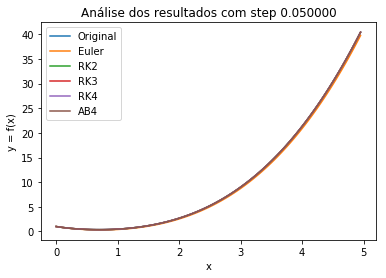

Euler:  94.69774869000904 %
RK2:  99.98029011298617 %
RK3:  99.99845650895948 %
RK4:  99.99845650895948 %
AB4:  99.99983672352113 %


In [8]:
# main.py 
import matplotlib.pyplot as plt 

n = 100
x0 = 0
y0 = 1 
h = 0.05
edo = edoC

# Solucao 'exata'
exata = []
for i in range(n): 
    x = x0 + h*i
    y = equacaoC_exata(x)
    exata.append(y)
    
# Utilizacao dos metodos de resolucao de edoh    
t_euler, euler = calcular_por_euler(edo, x0, y0, h, n)
t_rk2, rk2 = calcular_por_rk2(edo, x0, y0, h, n)
t_rk3, rk3 = calcular_por_rk3(edo, x0, y0, h, n)
t_rk4, rk4 = calcular_por_rk4(edo, x0, y0, h, n)
t_ab4, ab4 = calcular_por_ab4(edo, x0, y0, h, n)

# Plotagem dos resultados
plt.title('Análise dos resultados com step %f' %(h))
plt.xlabel("x")
plt.ylabel("y = f(x)")

legenda_exata, = plt.plot(t_euler, exata, label="Original")
legenda_euler, = plt.plot(t_euler, euler, label="Euler")
legenda_euler_melhorado, = plt.plot(t_rk2, rk2,label="RK2")
legenda_rk3, = plt.plot(t_rk3, rk3, label="RK3")
legenda_rk4, = plt.plot(t_rk4, rk4, label="RK4")
legenda_ab4, = plt.plot(t_ab4, ab4, label="AB4")

plt.legend(handles=[legenda_exata, legenda_euler, legenda_euler_melhorado, 
                    legenda_rk3, legenda_rk4, legenda_ab4])

plt.show()

# Analise de precisao 
print("Euler: ", calcular_precisao(exata, euler),"%")
print("RK2: ", calcular_precisao(exata, rk2),"%")
print("RK3: ", calcular_precisao(exata, rk3),"%")
print("RK4: ", calcular_precisao(exata, rk4),"%")
print("AB4: ", calcular_precisao(exata, ab4),"%")

<h3>Equações Diferenciais Ordinárias de Ordem N</h3>

<p style="text-align: justify; text-indent:4em">Para a resolução de equações diferenciais ordinárias de ordem maior do que 1, pode-se transformar essa EDO em um sistema de equações diferenciais de ordem 1. Utilizaremos a equação abaixo como exemplo. </p>

\begin{align*} 
\left(
\begin{array}{c}
y^{''} = y + e^{x}\\
y(0) = 1 \\
y^{'}(0) = 0 
\end{array}
\right)
\end{align*}

<p style="text-align: justify; text-indent:4em"> Pode-se utilizar variáveis auxiliares que representem as derivadas, da seguinte maneira: </p>

\begin{align*} 
\left(
\begin{array}{c}
y_1 = y \\
y_2 = y^{'}\\
\end{array}
\right)
\end{align*}

<p style="text-align: justify; text-indent:4em"> Assim, a EDO de ordem 2 pode ser escrita através do seguinte sistema de EDO's de ordem 1:  </p>

\begin{align*} 
\left(
\begin{array}{c}
y_1^{'} = y_2 \\
y_2{'} = y_1 + e^{x}\\
y_1(0) = 1 \\
y_2(0) = 0 
\end{array}
\right)
\end{align*}

<p style="text-align: justify; text-indent:4em"> Analogamente, pode-se fazer o mesmo processo para uma outra EDO de ordem 2, como a mostrada abaixo: </p>

\begin{align*} 
\left(
\begin{array}{c}
y^{''} = x + 1 \\
y(0) = 1 \\
y^{'}(0) = 0 
\end{array}
\right)
\end{align*}

<p style="text-align: justify; text-indent:4em"> De tal maneira que tem-se: </p>

\begin{align*} 
\left(
\begin{array}{c}
y_1 = y \\
y_2 = y^{'}
\end{array}
\right)
\end{align*}

<p style="text-align: justify; text-indent:4em"> E, finalmente: </p>

\begin{align*} 
\left(
\begin{array}{c}
y_1^{'} = y_2 \\
y_2{'} = x + y_1\\
y_1(0) = 1 \\
y_2(0) = 0 
\end{array}
\right)
\end{align*}

<p style="text-align: justify; text-indent:4em">A eficácia da resolução desse método numérico pode ser comparado com a solução analítica a seguir: </p>


\begin{align*} 
    y(x) = x^2 + 3x - 3
\end{align*}


<h3>Referências</h3>

<p>[1]</p>
<p>[2] https://pt.wikipedia.org/wiki/M%C3%A9todo_de_passo_m%C3%BAltiplo </p>